In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import sys

sys.path.append('../')

import void
from void.utils.graphvis import graph_visualizer as gv 

### Prepare training data with binary labels

In [2]:
X, y = make_moons(n_samples=500, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

In [3]:
# df = pd.DataFrame(dict(x=X_train[:,0], y = X_train[:,1], label = y_train))
df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = y))
df.head()

,x,y,label
0,-0.748116,0.744221,0
1,0.350644,0.852901,0
2,0.198458,0.939981,0
3,0.787953,0.707969,0
4,-0.845215,0.483439,0


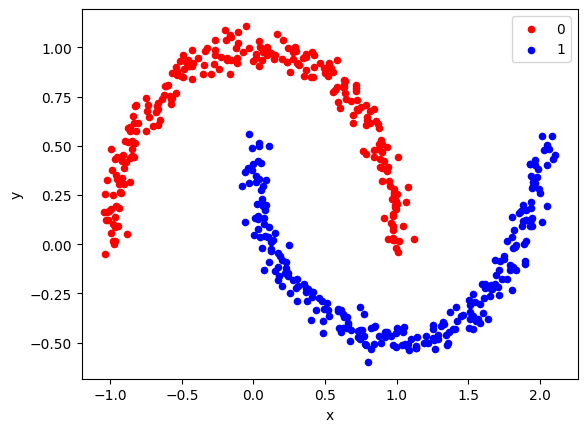

In [4]:
# Visualize non-linear binary classification task
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()

### Importing void

In [5]:
from void.nn.engine import Value 
from void.nn.nn import Neuron, Layer, MLP 

In [6]:
# Build the neural network
ROW, COL = X.shape
model = MLP(COL, [8,8,1])
model.layers[-1].neurons[-1].nonlin = 'sigmoid'# Change the last layer neuron to be relu
model

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8)], Layer of [SigmoidNeuron(8)]]

$$
\begin{align}
&\text{Log loss/ BCE}\\
&L = -\frac{1}{N} \cdot \sum^{N}_{i=1} y_{i} \ln(\hat{p}) + (1-y_{i}) \ln(1 - \hat{p})\\
&\text{where }\hat{p} = \frac{1}{1 + e^{-z}}\\
&\text{is the logistic function}
\end{align}
$$

In [7]:
ypred = [model(x) for x in X]

In [8]:
# Exponential decay learning rate
def exponential_lr(initial_lr, decay_rate, curr_epoch):
    return initial_lr * (decay_rate ** curr_epoch)

In [9]:
def gradient_descent(epoch):
    ypred = 0
    for e in range(epoch):
        ypred = [model(x) for x in X]
        # Forward
        loss = 0
        for yt, y_pred in zip(y, ypred):
            t1 = y_pred.ln()
            t2 = (1-y_pred).ln()
            loss += (yt * t1) + (1 - yt) * t2
       
        loss = ((-1)/len(ypred)) * loss
        # Backward
        loss.backward()
        
        # Update
        for p in model.parameters():
            lr = exponential_lr(1, 0.999999, e)
            # p.data -= 0.1 * p.grad
            p.data -= lr * p.grad
        
        # Zero grad
        model.zero_grad()
        
        print(f'epoch: {e} | loss: {loss}')
    

In [10]:
gradient_descent(150)

epoch: 0 | loss: Value(data=0.7963294028134378, grad=1)
epoch: 1 | loss: Value(data=0.510285080644694, grad=1)
epoch: 2 | loss: Value(data=0.4467419686390401, grad=1)
epoch: 3 | loss: Value(data=0.40362911267961427, grad=1)
epoch: 4 | loss: Value(data=0.3712756638211005, grad=1)
epoch: 5 | loss: Value(data=0.3471722292971249, grad=1)
epoch: 6 | loss: Value(data=0.3288007720863719, grad=1)
epoch: 7 | loss: Value(data=0.313621361968044, grad=1)
epoch: 8 | loss: Value(data=0.3004790394900928, grad=1)
epoch: 9 | loss: Value(data=0.2887429663444981, grad=1)
epoch: 10 | loss: Value(data=0.2784529854651167, grad=1)
epoch: 11 | loss: Value(data=0.2693231146608146, grad=1)
epoch: 12 | loss: Value(data=0.26146454787374035, grad=1)
epoch: 13 | loss: Value(data=0.25476933951317904, grad=1)
epoch: 14 | loss: Value(data=0.24948273283294523, grad=1)
epoch: 15 | loss: Value(data=0.24517856234511828, grad=1)
epoch: 16 | loss: Value(data=0.24163539631021796, grad=1)
epoch: 17 | loss: Value(data=0.238669

In [11]:
X, Y = np.mgrid[-2:3:100j,-1:2:100j]
X = X.flatten()
Y = Y.flatten()

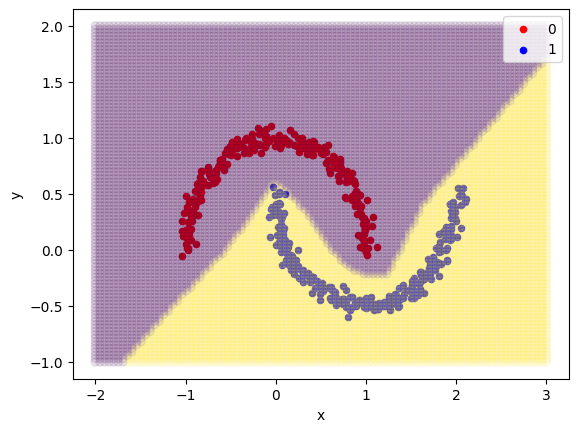

In [12]:
# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
prediction = [1 if model([x,y]).data > 0.8 else 0 for x, y in zip(X,Y)]
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.scatter(X, Y, alpha = 0.1, c = prediction)
plt.show()